# Phase 4 Project

In [1]:
# Name: Jiarong Chen
# Contact info: jiarong.chen.1@alumni.stonybrook.edu

Business problems: Using the movie lens 100k data to analyze the movies’ rating and make a movie recommendation system.

### Outline
Best Rating Movie
* Count the total movie rating and rating times
* Sort the movies by mean rating
* Determine the best movie base on mean rating and rating times

Best Movie Genre
* Build a genre data frame for all movies
* Fill the genre data frame with total rating and rating times
* Sort the genre data frame and determine the best one

Recommendation System
* Train a suitable algorithm
* Tune hyper parameter for this model
* Build a recommendation system

# Import data and Preview

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [3]:
movies = pd.read_csv('data/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [4]:
# Drop unnecessary columns
ratings.drop(columns=['userId', 'timestamp'], inplace=True)
print('No. of Unique Movies    :', ratings['movieId'].nunique())
print('No. of Unique Ratings  :', ratings['rating'].nunique())

No. of Unique Movies    : 9066
No. of Unique Ratings  : 10


In [5]:
ratings.describe()

,movieId,rating
count,100004.000000,100004.000000
mean,12548.664363,3.543608
std,26369.198969,1.058064
min,1.000000,0.500000
25%,1028.000000,3.000000
50%,2406.500000,4.000000
75%,5418.000000,4.000000
max,163949.000000,5.000000


# Movie Rating Table

Only the movies with rating times over 10 are qualify for the best movie standard.

In [6]:
ratings['rating_times'] = None
ratings = ratings.fillna(1)

In [7]:
rating_movie = ratings.groupby('movieId').sum()
# Remove some movie rating times under 11
rating_movie = rating_movie.loc[rating_movie['rating_times']>10] 
# Take the mean rating for each movie
rating_movie['rating'] = rating_movie['rating'] / rating_movie['rating_times']
rating_movie.head()

,rating,rating_times
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


In [8]:
rating_sorted = rating_movie.sort_values('rating', ascending=False)[:10]

In [9]:
# Join the rating table with movie table
rating_final = rating_sorted.join(movies.set_index('movieId'), how='left')

In [10]:
# Review the data
rating_final

,rating,rating_times,title,genres
movieId,,,,
1939,4.636364,11,"Best Years of Our Lives, The (1946)",Drama|War
3469,4.541667,12,Inherit the Wind (1960),Drama
858,4.487500,200,"Godfather, The (1972)",Crime|Drama
318,4.487138,311,"Shawshank Redemption, The (1994)",Crime|Drama
1948,4.458333,12,Tom Jones (1963),Adventure|Comedy|Romance
8132,4.454545,11,Gladiator (1992),Action|Drama
1945,4.448276,29,On the Waterfront (1954),Crime|Drama
1147,4.437500,16,When We Were Kings (1996),Documentary
926,4.434211,38,All About Eve (1950),Drama


# Visualization

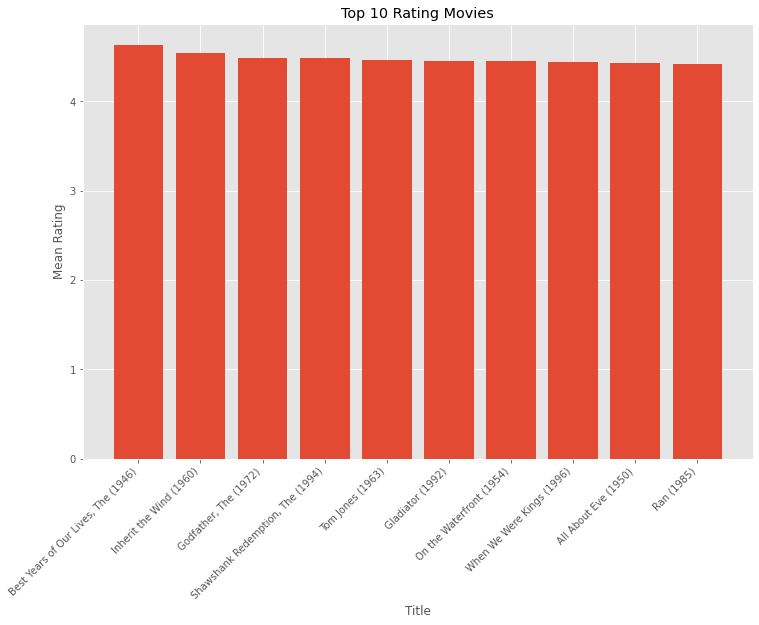

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x=rating_final['title'], height=rating_final['rating'])
plt.title('Top 10 Rating Movies')
plt.xlabel('Title')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Conclusion

From the table and graph above, we can see that the highest top 10 movies mean rating are very close which ranging from 4.42 to 4.64. Even though Best Years of Our Lives, The has the highest rating, I still recommend Godfather, The and Shawshank Redemption, The. Because these two movies only have to similar rating, but also have a larger rating times which can highly prove the rating quality. Therefore, I would say the best movie in this case is Godfather, The (1972).